In [1]:
import sys
import os
sys.path.append("../..")
from diachr import DiachromaticInteractionSet
from diachr import ReadTypeAndConfigCounter

# Create directory for output files generated in this notebook 
NOTEBOOK_RESULTS_DIR = 'read_type_and_configuration_frequencies_results'
%mkdir -p $NOTEBOOK_RESULTS_DIR

# Read type and configuration frequencies

In this notebook, we determine the frequencies of the four types of mapped paired-end reads and the ten configurations across interactions of an interaction file generated with `DICer.py`, i.e., the interactions have already been classified as unbalanced or balanced. In order to keep the layout clear we have outsourced functions functions for counting and plotting to a separate module.

In [2]:
rtac_Counter = ReadTypeAndConfigCounter()

## Loading interaction data

We generated interaction files for Hi-C and cpature Hi-C data on the 17 hematopoietic cell types using `DICer` and placed them in a directory named `diachrscripts/DICer_interactions`.

### Download interaction file for Mifsud data

 In addition, we provide a corresponding interaction file for download, which we have prepared for capture Hi-C data from the publication by [Mifsud et al. (2015)](https://pubmed.ncbi.nlm.nih.gov/25938943/).

In [3]:
!mkdir -p ../../DICer_interactions/CHC
!wget -O ../../DICer_interactions/CHC/MIF_GM12878_CHC_REPC_evaluated_and_categorized_interactions.tsv.gz https://www.genecascade.org/downloads/diachrscripts/MIF_REPC_evaluated_and_categorized_interactions.tsv.gz

--2022-10-07 06:40:15--  https://www.genecascade.org/downloads/diachrscripts/MIF_REPC_evaluated_and_categorized_interactions.tsv.gz
Resolving www.genecascade.org (www.genecascade.org)... 193.175.174.14
Connecting to www.genecascade.org (www.genecascade.org)|193.175.174.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70203503 (67M) [application/x-gzip]
Saving to: ‘../../DICer_interactions/CHC/MIF_GM12878_CHC_REPC_evaluated_and_categorized_interactions.tsv.gz’

../../DICer_interac 100%[===================>]  66.95M  6.85MB/s    in 9.7s    

2022-10-07 06:40:25 (6.88 MB/s) - ‘../../DICer_interactions/CHC/MIF_GM12878_CHC_REPC_evaluated_and_categorized_interactions.tsv.gz’ saved [70203503/70203503]



### Choose a file

In [4]:
AUTHOR = 'JAV' # MIF or JAV
PROTOCOL = 'CHC' # HC or CHC
CELL_TYPE_SHORT = 'MAC_M0' # GM12878, MK, ERY, NEU, MON, MAC_M0, ...
OUT_PREFIX = AUTHOR + '_' + CELL_TYPE_SHORT + '_' + PROTOCOL +'_REPC'
INTERACTION_FILE = '../../DICer_interactions/' + PROTOCOL + '/' + OUT_PREFIX + '_evaluated_and_categorized_interactions.tsv.gz'    

### Read interactions into data structure

In [5]:
# Create DiachromaticInteractionSet
d11_interaction_set = DiachromaticInteractionSet()
d11_interaction_set.parse_file(
    i_file = INTERACTION_FILE,
    verbose = True)

[INFO] Parsing Diachromatic interaction file ...
	[INFO] ../../DICer_interactions/CHC/JAV_MAC_M0_CHC_REPC_evaluated_and_categorized_interactions.tsv.gz
	[INFO] Parsed 1,000,000 interaction lines ...
	[INFO] Parsed 2,000,000 interaction lines ...
	[INFO] Parsed 3,000,000 interaction lines ...
	[INFO] Parsed 4,000,000 interaction lines ...
	[INFO] Parsed 5,000,000 interaction lines ...
	[INFO] Parsed 6,000,000 interaction lines ...
	[INFO] Parsed 7,000,000 interaction lines ...
	[INFO] Parsed 8,000,000 interaction lines ...
	[INFO] Parsed 9,000,000 interaction lines ...
	[INFO] Set size: 9,648,210
[INFO] ... done.


## Frequencies of the for types of mapped paired-end reads

In paired-end sequencing, four types read pairs can be distinguished after mapping:

1. The reads are mapped onto different strands and point to each other (Type `0`)
2. The reads are mapped onto different strands and point away from each other (Type `1`)
3. The reads both are mapped to the forward strand (Type `2`)
4. The reads both are mapped to the reverse strand (Type `3`)

Here we determine the frequencies of the four types across all interactions as well as across all unbalanced and balanced interactions.

### Count reads separately by type

In [6]:
RP_TYPE_FREQ_DICT, RP_TYPE_DENS_DICT = rtac_Counter.count_read_types(d11_interaction_set)

### Output frequencies as a table

In [7]:
rtac_Counter.print_read_type_frequency_tables(
    rp_type_freq_dict = RP_TYPE_FREQ_DICT,
    rp_type_dens_dict = RP_TYPE_DENS_DICT,
    i_cats = ['U','B','ALL'],
    print_dens=True)

U
		T0	T1	T2	T3
	NN: 	0.27	0.23	0.18	0.31
	EE: 	0.28	0.22	0.26	0.25
	NE: 	0.25	0.25	0.25	0.25
	EN: 	0.29	0.21	0.28	0.22
	ALL: 	0.27	0.23	0.26	0.23

B
		T0	T1	T2	T3
	NN: 	0.26	0.24	0.24	0.26
	EE: 	0.25	0.24	0.26	0.25
	NE: 	0.25	0.25	0.25	0.25
	EN: 	0.26	0.24	0.25	0.25
	ALL: 	0.25	0.25	0.25	0.25

ALL
		T0	T1	T2	T3
	NN: 	0.26	0.24	0.22	0.28
	EE: 	0.27	0.22	0.26	0.25
	NE: 	0.25	0.25	0.25	0.25
	EN: 	0.28	0.22	0.27	0.23
	ALL: 	0.27	0.23	0.26	0.24



### Output frequencies as a bar chart

Use `NN`, `NE`, `EN` or `EE` to plot the frequencies of specific enrichment categories. Use `ALL` to plot the frequencies across all enrichment categories.

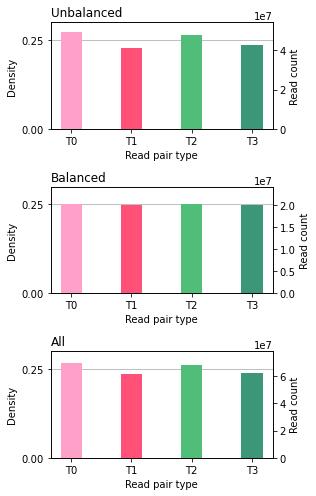

In [8]:
fig = rtac_Counter.create_read_type_frequency_bar_charts(
    rp_type_freq_dict = RP_TYPE_FREQ_DICT,
    rp_type_dens_dict = RP_TYPE_DENS_DICT,
    i_cats = ['U','B','ALL'],
    e_cat = 'ALL',
    pdf_file_name = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_rp_type_frequency_bar_charts.pdf')

## Frequencies of configurations

We distinguish ten configurations of interactions (`0X`, `1X`, `2X`, `3X`, `01`, `02`, `03`, `12`, `13`, `23`), depending on which of the four types of mapped paired-end reads predominate within individual interactions.

### Count interactions separately by configuration

In [9]:
CONF_FREQ_DICT, CONF_DENS_DICT = rtac_Counter.count_configurations(d11_interaction_set)

### Output frequencies as a table

In [10]:
rtac_Counter.print_configuration_frequency_tables(
    conf_freq_dict = CONF_FREQ_DICT,
    conf_dens_dict = CONF_DENS_DICT,
    i_cats = ['U', 'B', 'ALL'])

U
		NN		EE		NE		EN		ALL
	0X: 	14,070 (0.06)	4,084 (0.03)	70,528 (0.03)	77,543 (0.04)	166,225 (0.04)
	1X: 	10,415 (0.05)	3,220 (0.02)	70,910 (0.03)	63,068 (0.03)	147,613 (0.03)
	2X: 	9,510 (0.04)	4,075 (0.03)	80,176 (0.04)	81,792 (0.04)	175,553 (0.04)
	3X: 	13,453 (0.06)	4,238 (0.03)	61,517 (0.03)	60,398 (0.03)	139,606 (0.03)
	01: 	6,998 (0.03)	2,058 (0.01)	24,698 (0.01)	24,390 (0.01)	58,144 (0.01)
	02: 	37,873 (0.16)	38,713 (0.25)	218,239 (0.11)	776,814 (0.38)	1,071,639 (0.24)
	03: 	53,799 (0.23)	35,186 (0.23)	626,152 (0.31)	197,145 (0.10)	912,282 (0.20)
	12: 	33,356 (0.14)	31,349 (0.20)	694,497 (0.34)	199,326 (0.10)	958,528 (0.21)
	13: 	44,461 (0.19)	28,643 (0.19)	181,151 (0.09)	551,471 (0.27)	805,726 (0.18)
	23: 	6,407 (0.03)	2,944 (0.02)	21,630 (0.01)	21,137 (0.01)	52,118 (0.01)
B
		NN		EE		NE		EN		ALL
	0X: 	440 (0.00)	107 (0.00)	1,088 (0.00)	1,296 (0.00)	2,931 (0.00)
	1X: 	297 (0.00)	101 (0.00)	1,263 (0.00)	1,008 (0.00)	2,669 (0.00)
	2X: 	295 (0.00)	107 (0.00)	1,410 (0.00)	1,329 (0

### Output frequencies as a bar chart

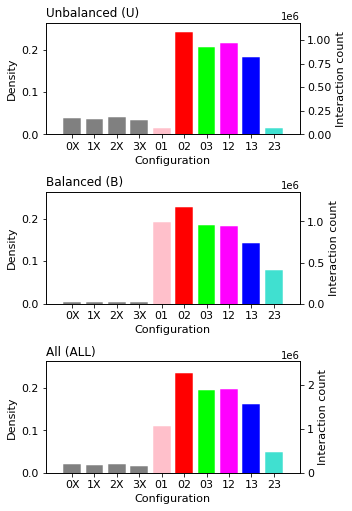

In [11]:
# Use this method for Hi-C datasets
fig = rtac_Counter.create_configuration_frequency_bar_charts(
    i_cats = ['U', 'B', 'ALL'],
    conf_freq_dict = CONF_FREQ_DICT,
    e_cat_1 = 'ALL',
    pdf_file_name = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_configuration_frequency_bar_charts.pdf'
    )

### Output frequencies as a bar chart with two bars for each configuration

For capture Hi-C data, we can distinguish interactions by enrichment states, i.e., whether interaction go from the baited digest towards 5' (`NE`) or 3' (`EN`) direction.

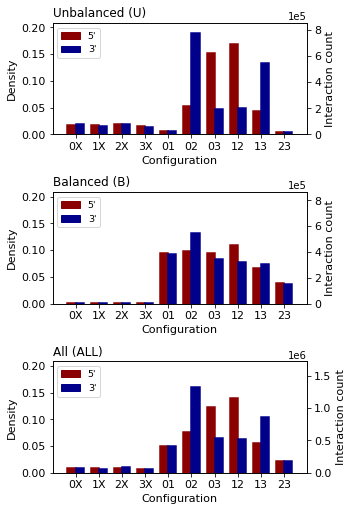

In [12]:
# Use this for CHC data
fig = rtac_Counter.create_configuration_frequency_bar_charts_2(
    conf_freq_dict = CONF_FREQ_DICT,
    i_cats = ['U', 'B', 'ALL'],
    e_cat_1 = 'NE',
    e_cat_2 = 'EN',
    e_cat_1_color = 'darkred',
    e_cat_2_color = 'darkblue',
    pdf_file_name = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_configuration_frequency_bar_charts_2.pdf'
    )